In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/07 11:20:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('File_2_ID_2015_Domains_of_deprivation.csv', inferSchema=True, header=True)
df.printSchema()
df.count()

root
 |-- lsoa11cd: string (nullable = true)
 |-- LSOA_name_(2011): string (nullable = true)
 |-- ladcd: string (nullable = true)
 |-- Local_Authority_District_name_(2013): string (nullable = true)
 |-- Multiple_Deprivation_Rank: string (nullable = true)
 |-- Multiple_Deprivation_Decile: integer (nullable = true)
 |-- Income_Rank: string (nullable = true)
 |-- Income_Decile: integer (nullable = true)
 |-- Employment_Rank: string (nullable = true)
 |-- Employment_Decile: integer (nullable = true)
 |-- Education_Rank: string (nullable = true)
 |-- Education_Decile: integer (nullable = true)
 |-- Health_Deprivation_Rank: string (nullable = true)
 |-- Health_Deprivation_Decile: integer (nullable = true)
 |-- Crime_Rank: string (nullable = true)
 |-- Crime_Decile: integer (nullable = true)
 |-- Barriers_to_Housing_and_Services_Rank: string (nullable = true)
 |-- Barriers_to_Housing_and_Services_Decile: integer (nullable = true)
 |-- Living_Environment_Rank: string (nullable = true)
 |-- Liv

32844

In [3]:
for attributes, dtype in df.dtypes:
    print(attributes, dtype)

lsoa11cd string
LSOA_name_(2011) string
ladcd string
Local_Authority_District_name_(2013) string
Multiple_Deprivation_Rank string
Multiple_Deprivation_Decile int
Income_Rank string
Income_Decile int
Employment_Rank string
Employment_Decile int
Education_Rank string
Education_Decile int
Health_Deprivation_Rank string
Health_Deprivation_Decile int
Crime_Rank string
Crime_Decile int
Barriers_to_Housing_and_Services_Rank string
Barriers_to_Housing_and_Services_Decile int
Living_Environment_Rank string
Living_Environment_Decile int


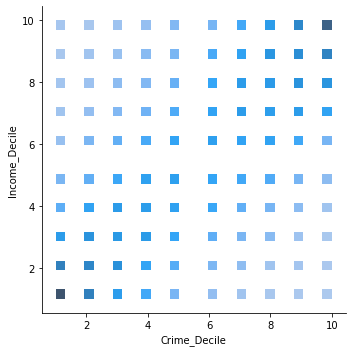

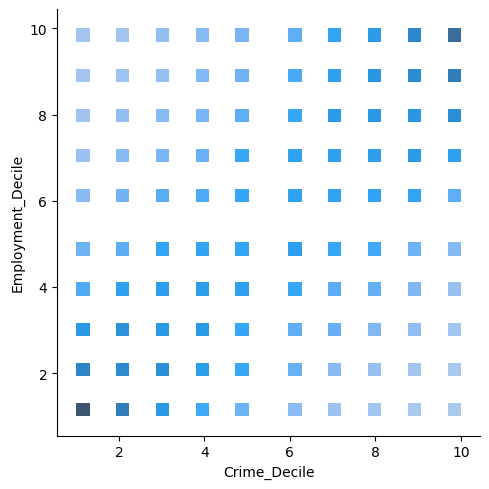

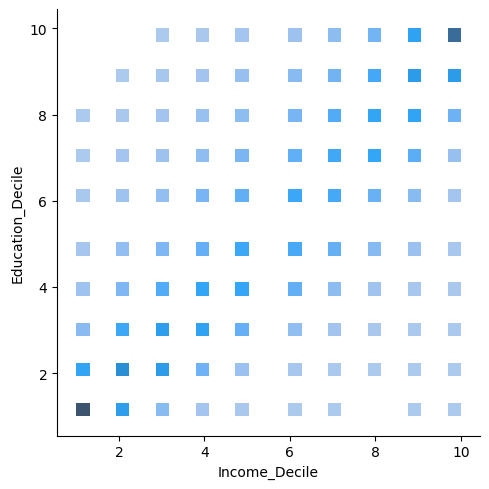

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_data = df.toPandas()

sns.displot(data=pandas_data, x="Crime_Decile", y="Income_Decile")
sns.displot(data=pandas_data, x="Crime_Decile", y="Employment_Decile")
sns.displot(data=pandas_data, x="Income_Decile", y="Education_Decile")

In [5]:
from pyspark.sql.functions import *

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical = True)


-RECORD 0--------------------------------------
 lsoa11cd                                | 0   
 LSOA_name_(2011)                        | 0   
 ladcd                                   | 0   
 Local_Authority_District_name_(2013)    | 0   
 Multiple_Deprivation_Rank               | 0   
 Multiple_Deprivation_Decile             | 0   
 Income_Rank                             | 3   
 Income_Decile                           | 0   
 Employment_Rank                         | 0   
 Employment_Decile                       | 0   
 Education_Rank                          | 1   
 Education_Decile                        | 0   
 Health_Deprivation_Rank                 | 22  
 Health_Deprivation_Decile               | 0   
 Crime_Rank                              | 0   
 Crime_Decile                            | 0   
 Barriers_to_Housing_and_Services_Rank   | 3   
 Barriers_to_Housing_and_Services_Decile | 0   
 Living_Environment_Rank                 | 0   
 Living_Environment_Decile              

In [6]:
df.show(1,vertical = True)
print("Total Number of Rows:", df.count())
print("Total Number of Columns:", len(df.columns))

-RECORD 0--------------------------------------------
 lsoa11cd                                | E01031349 
 LSOA_name_(2011)                        | Adur 001A 
 ladcd                                   | E07000223 
 Local_Authority_District_name_(2013)    | Adur      
 Multiple_Deprivation_Rank               | 21,352    
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 18,992    
 Income_Decile                           | 6         
 Employment_Rank                         | 19,305    
 Employment_Decile                       | 6         
 Education_Rank                          | 13,727    
 Education_Decile                        | 5         
 Health_Deprivation_Rank                 | 25,876    
 Health_Deprivation_Decile               | 8         
 Crime_Rank                              | 12,817    
 Crime_Decile                            | 4         
 Barriers_to_Housing_and_Services_Rank   | 28,166    
 Barriers_to_Housing_and_Ser

In [7]:
df = df.withColumn("Multiple_Deprivation_Rank",)
df.printSchema()

df.show(vertical = True)
# df.createOrReplaceTempView('new_data')
# new_data = spark.sql("SELECT * FROM new_data WHERE Multiple_Deprivation_Rank < 20000")
# new_data.show(1,vertical =True)
# print("Total Number of Rows:", new_data.count())

-RECORD 0--------------------------------------------
 lsoa11cd                                | E01031349 
 LSOA_name_(2011)                        | Adur 001A 
 ladcd                                   | E07000223 
 Local_Authority_District_name_(2013)    | Adur      
 Multiple_Deprivation_Rank               | 21,352    
 Multiple_Deprivation_Decile             | 7         
 Income_Rank                             | 18,992    
 Income_Decile                           | 6         
 Employment_Rank                         | 19,305    
 Employment_Decile                       | 6         
 Education_Rank                          | 13,727    
 Education_Decile                        | 5         
 Health_Deprivation_Rank                 | 25,876    
 Health_Deprivation_Decile               | 8         
 Crime_Rank                              | 12,817    
 Crime_Decile                            | 4         
 Barriers_to_Housing_and_Services_Rank   | 28,166    
 Barriers_to_Housing_and_Ser